Support Vector Machines
=========================

## SVM with non-linear decision boundary

*This example uses as support vector machine to create a non-linear decision boundary to separate two classes*

### Import libraries 
We will mostly be using numpy for mathematical operations and matplotlib to produce plots. Scipy and Scikit-Learn are also used for training 

In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import scipy.optimize as opt
import scipy.io as sio
from sklearn import svm 

### Load Data

In [2]:
mat = sio.loadmat("../data/ex6data2")
X, y = mat['X'], mat['y']

#     X: (863,2)
#     y: (863,1)

### Training

In [3]:
# Organise data into classes
#c1,c2 = np.where(y==1),np.where(y==0)
c1,c2 = (y == 1).ravel(),(y == 0).ravel()

# Train the SVM with the Radial Basis Function (RBF) 
'''
gamma defines how far the influence of a single training examples reaches, with low values meaning 'far' and high values meaning 'close'
A low C-Support value makes the decision surface smooth, while a high C-Support aims to classify all training examples correctly
'''
Csup = 20
gamma = 30
clf = svm.SVC(C=Csup, kernel='rbf', gamma=gamma)
clf.fit( X, y.flatten() )

SVC(C=20, cache_size=200, class_weight=None, coef0=0.0, degree=3, gamma=30,
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

### Decision Boundary

In [4]:
def decision_boundary(svc, X,samples=100):
    '''
        svc is scikit-learn SVM class using C-Support Vector Classification
    '''
    x1 = np.linspace(np.min(X[:,0])-0.25,np.max(X[:,0])+0.25,samples)
    x2 = np.linspace(np.min(X[:,1])-0.25,np.max(X[:,1])+0.25,samples)

    z = np.zeros((samples,samples))
    for j in xrange(samples):
        for i in xrange(samples):
            z[j][i] = float(svc.predict([[x1[j],x2[i]]]))

    return x1,x2,z.transpose()

In [5]:
# Generate arrays to plot the decision boundary
x1points,x2points,z = decision_boundary(clf, X, samples=500)

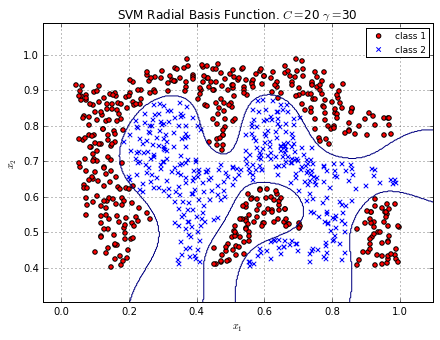

In [6]:
# Plot data with decision boundary
fig = plt.figure(figsize=(7, 5),facecolor='w', edgecolor='k')
plt.scatter(X[c1,0], X[c1,1], marker='o',c='r',label='class 1')
plt.scatter(X[c2,0], X[c2,1], marker='x',c='b',label='class 2')
plt.contour(x1points, x2points, z, levels=[0], linewidth=2)
plt.xlim([min(X[:,0]-0.1),max(X[:,0])+0.1])
plt.ylim([min(X[:,1]-0.1),max(X[:,1])+0.1])
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.title("SVM Radial Basis Function. $C=$" + str(Csup) + " $\gamma =$" + str(gamma) )
plt.legend(loc='best', prop={'size':9},scatterpoints=1)
plt.grid(True)
plt.show()